<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Bag of Visual Words - Assignment 2

     Instructor: Kris Kitani                   TAs: Sheng-Yu, Jinkun, Rawal, Arka, Rohan

## Theory Questions

This section should include the visualizations and answers to specifically highlighted questions from P1 to P4. This section will be manually Graded 

#### Q1.1.1 (5 Points WriteUp)
What visual properties do each of the filter functions (See Figure below) pick up? You should group the filters into categories by its purpose/functionality. Also, why do we need multiple scales of filter responses? **Answer in the writeup. Answer in your write-up.**

<img align="center" src="figures/filters_image.png" width="500">
<figcaption align="center"><b>Figure1. The provided multi-scale filter bank</b></figcaption>

The first row picks up circular objects at different scales that are near the center of the kernel/image because the "hot" portion is in the middle. For the second row, this likely picks up donut shaped objects at different scales with a high response with high pixels on the outside of the image and low pixels on the inside of the image/kernel. The third responds highly objects with a high graident to the left, good for detecting edges in the x direction at different scales. The fourth we pick up on strong edges up (high response for a high gradient going up the image/kernel), this is good for detecting edges in the y direction

Q1.1.2:
    
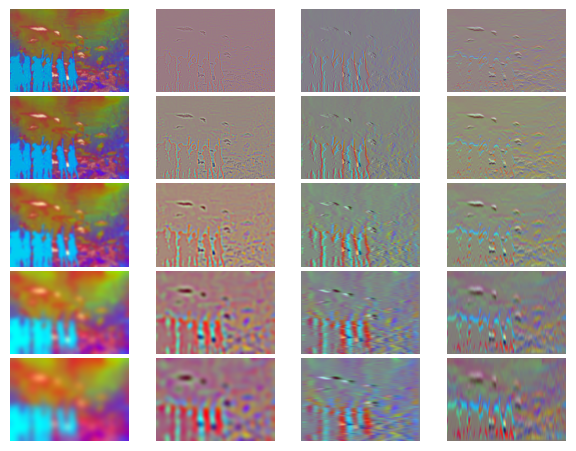    

Q1.2.1: Harris Corners Images

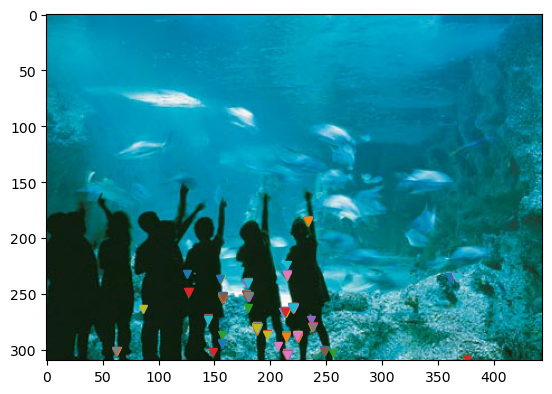

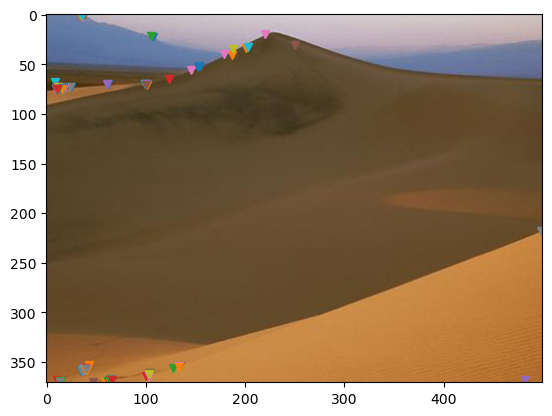

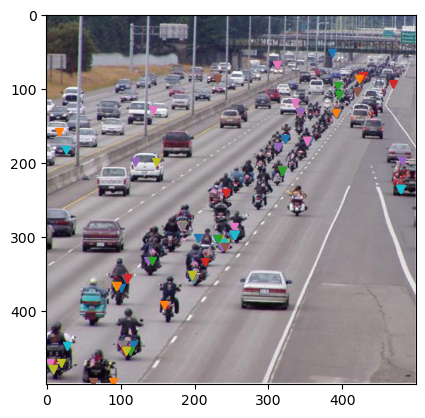

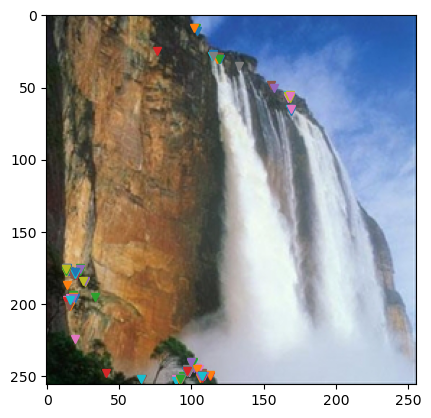

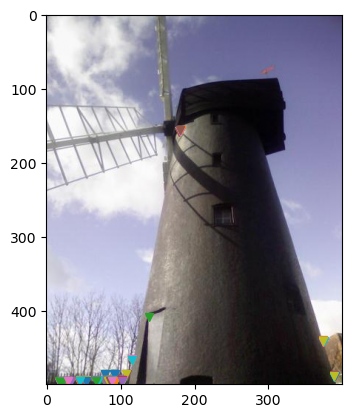

### Q1.3.1 (5 Points WriteUp)

Visualize three wordmaps of images from any one of the category. **Include these in your write-up, along with the original RGB images. Include some comments on these visualizations: do the “word” boundaries make sense to you?**. We have provided helper function to save and visualize the resulting wordmap in the util.py file. They should look similar to the ones in Figure 2.

<img align="center" src="./figures/textons.jpg" width="800">
<figcaption align = "center"><b>Figure 2. Visual words over images. You will use the spatially un-ordered distribution of visual words in a region (a bag of visual words) as a feature for scene classification, with some coarse information provided by spatial pyramid matching [2]</b></figcaption>

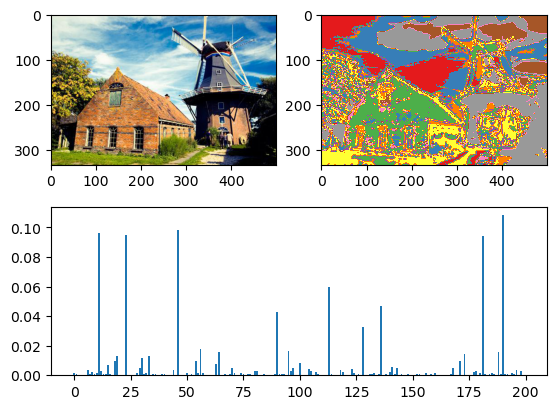

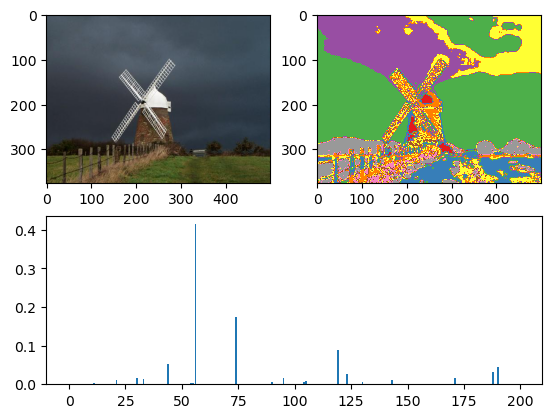

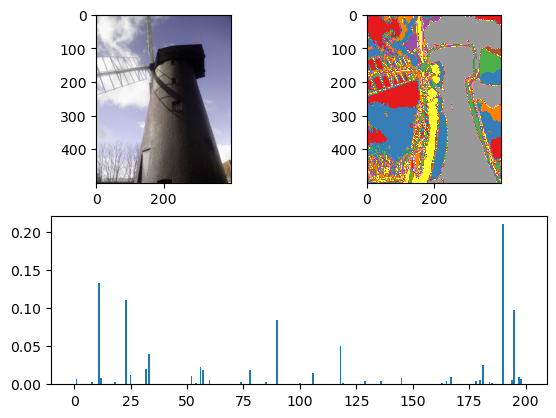

The boundaries do make sense and segment the image, they are very related to different extures and edges that we see in the image. I think that the background does add a lot of variance in these windmill iamges. I see there is a lot of difference in the posturing of the windmill but I still think that the histograms still show a good amount of similarities

### Q2.1
**For 5 Images, include their visual word maps and histograms**

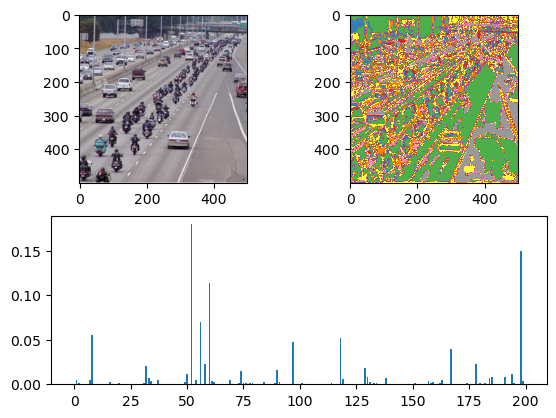

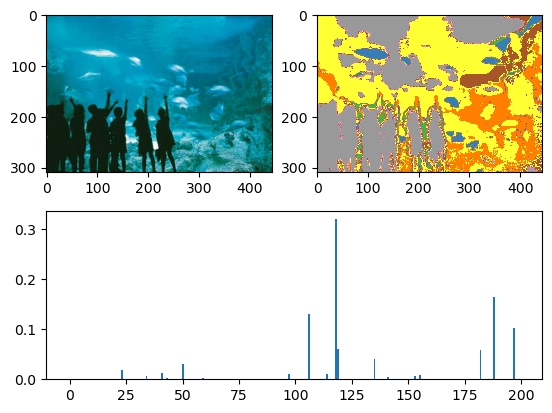

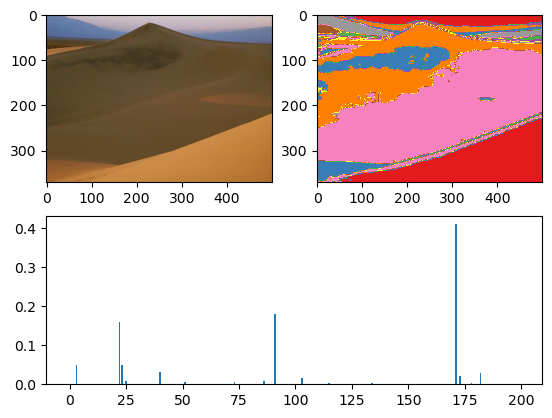

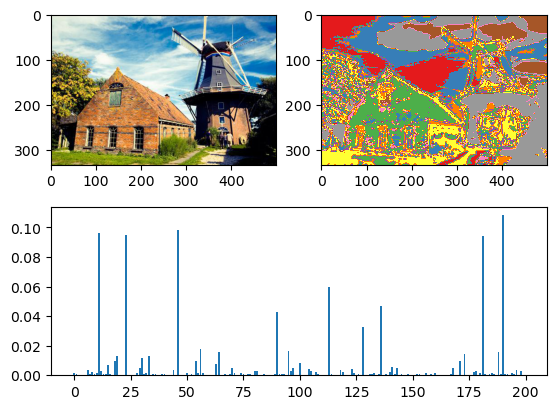

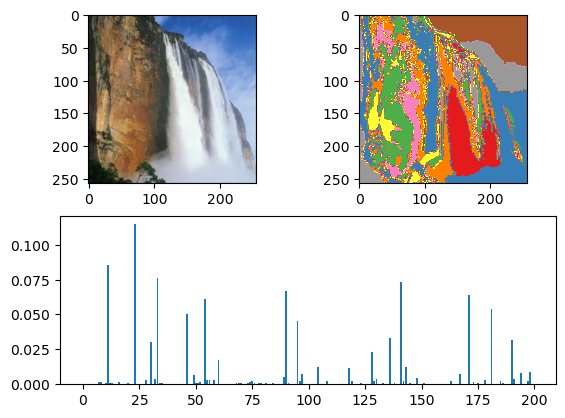

YOUR ANSWER HERE

### Q3.1.1 
Submit the visualization of Confusion Matrix and the Accuracy value

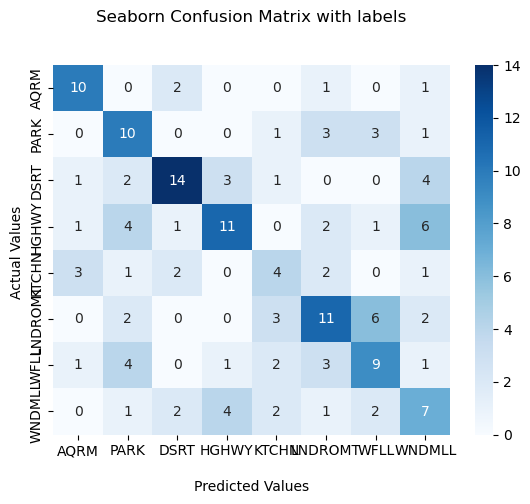

Accuracy: 0.475


#### Q3.1.2 (5 points WriteUp):

As there are some classes/samples that are more difficult to classify than the rest using the bags-of-words approach, they are more easily classified incorrectly into other categories. **List some of these classes/samples and discuss why they are more difficult.**

There are three cases that really stand out in the confusion matrix and it all make sense. The first one I noted above but anything that has significant background variance has a pretty tough time. For example, the windmill has a lot of issues because of all of the background and variance in the sky. The waterfall falls victim to a similar fate with all the different sceneries. In addition, the kitchen class has so many varying environment pieces, it is harder to correlate strongly to a single class.

### Q3.1.3 [Extra Credit](10 points) Manually Graded:

Now that you have seen how well your recognition system can perform on a set of real images, you can experiment with different ways of improving this baseline system. 

Include the changes, modification you made and the impact it had on accuracy.

Tune the system you build to reach around 65\% accuracy on the provided test set (``data/test_data.npz``). **In your writeup, document what you did to achieve such performance: (1) what you did, (2) what you expected would happen, and (3) what actually happened.** Also, include a file called ``custom.py/ipynb`` for running your code.

Number of clusters: I first tried to increase the number of clusters expecting the accuracy to go up because there would possibly be a more diverse and meaningful amount of visual words. I also incrased alpha to 200, expecting performance to increase but it only brought the accuracy down into the low 40s. In turn, the next iteration I lowered alpha and the number of clusters. It got performance to the higher 40s but it still wasn't the boost I was looking for. Next, I switched to an SVM classifier with an RBF kernel. I suspected that it would improve performance quite a bit because it would work towards separating the classes as much as possible. In turn, I was hoping that this would offer a boost while using the RBF kernel would still look towards keeping a "keep a certain amounts of points in a certain radius) approach. It ended up being a big boost, bringing the accuracy into the low 60s. From there, I figured collected more layers of features may give a more complete representaiton of different scales of the image and would give another bump to performance. It did boost performance but only by a couple percent, once I got past 5 layers, the result the difference was negligible which surprised me a bit. I also tried doing minmax normalization and whitening the images. This did not have a positive impact to the performance. Instead, performance dipped back to the 40s. If given more time, I would probably try some more thoughtful image normalization strategies like subtracting by the average mean of the images. 

Attached is the current best plot, I had my performance up to 63 at one point but was not able to quite reproduce those results
Normalization = None
SPM Layers = 4
Clusters = 100
Alpha = 150
Classifier = SVM RBF Kernel

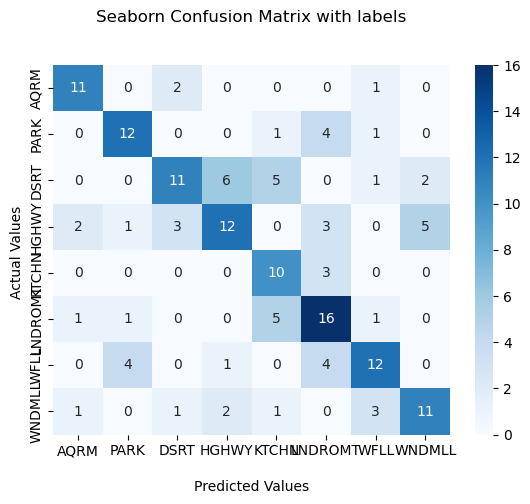

Accuracy: 0.59375

### Q3.1.4 [Extra Credit] (5 points write up):
**GIST feature descriptor:** As introduced during the lecture, GIST feature descriptor is a feature extractor based on Gabor Filters. When we apply it to images, we have to implement the 2D Gabor Filters as described below

<img align="center" src="figures/gist.png" width="800">

<font color="blue">**In your writeup: How does GIST descriptor affect the performance? Better or worse? Explain your reasoning?**

Outputs of the gabor filters on the RGB images:
Down is increasing scale, Across is greater angle of orientation

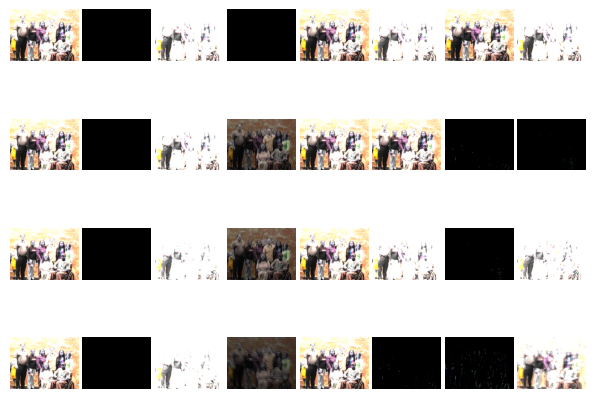

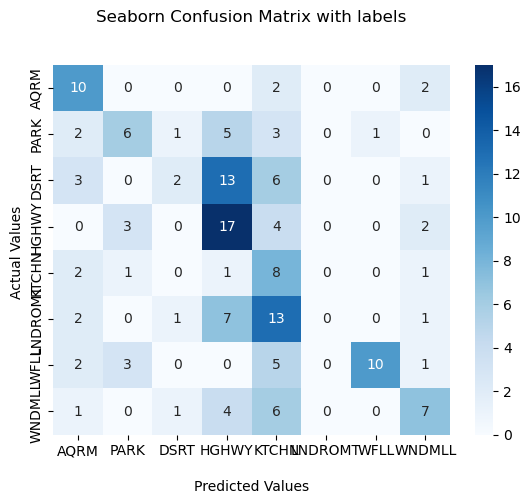

Accuracy: 0.375
Classifier: SVM (RBF Kernel)

The GIST feature descriptor performs quite a bit worse. I think this is probably because this is capturing a lot of low level features but there really isn't anything to strongly correlate those low level features to high level features. Neural networks to a good job of this by having backbones to specialize in capturing low level features and associating them to higher level features. The bag of words does a pretty good job at generalizing parts of the image into visual words as well so it performs better. This may be a good first step but would likely need some additional steps to accurately perform scene classification.

### Q4.2.1 (2 points write up)
**Report the confusion matrix and accuracy for your results in your write-up. Can you comment in your writeup on whether the results are better or worse than classical BoW - why do you think that is?**

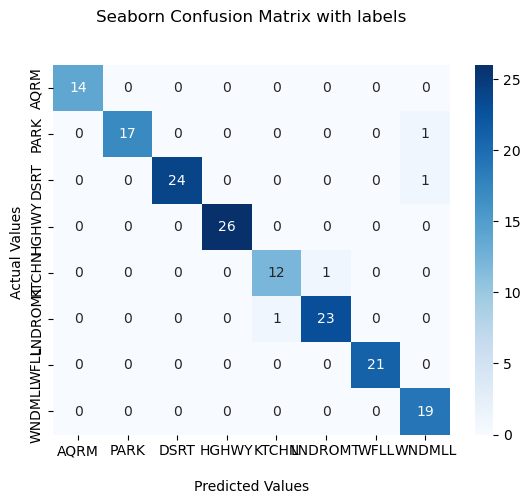

Accuracy: 0.975

The results are much better. The VGG deep network calculates multiple different feature maps across many different scales. Operations like the max pooling operations will essentially work towards changing the scales of the features detected while the Conv2D will actually be detecting the features themselves. I think the variety and surplus of features in addition to learning an optimal weighting mechanism connecting lower level and higher level features makes gives a much fuller representation than the bag of words which still does a decent job but is not quite as extensive, only finding a set number of spatial pyramid layers that do not have any connections between the layers

### Q4.3.2 [Extra Credit] (2 points write up)
**Report the confusion matrix and accuracy for your ViT results in your write-up. Can you comment in your writeup on whether the results are better or worse than VGG - why do you think that is? A short answer is okay.**

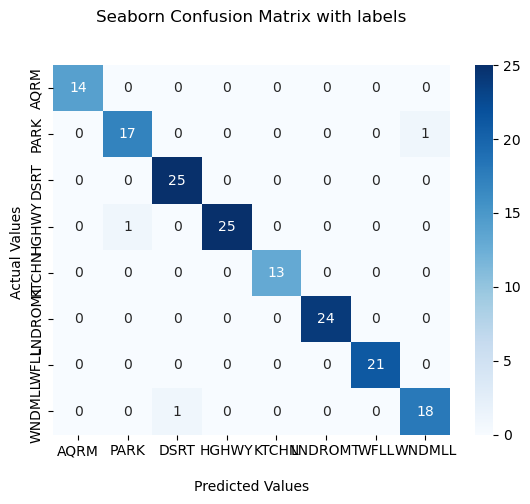

Accuracy: 0.98125

The results are an improvement over the VGG results, rasing almost one percentage point in accuracy. I'm not quite sure why yet but possibly because the positional encoding portion adds some additional contet to aid in classification. I am excited to learn more about it when we cover transformers.

### References

[1]  James Hays and Alexei A Efros. Scene completion using millions of photographs.ACM Transactions onGraphics (SIGGRAPH 2007), 26(3), 2007.

[2]  S. Lazebnik, C. Schmid, and J. Ponce. Beyond bags of features: Spatial pyramid matching for recogniz-ing natural scene categories.  InComputer Vision and Pattern Recognition (CVPR), 2006 IEEE Conferenceon, volume 2, pages 2169–2178, 2006.

[3]  Jian xiong Xiao, J. Hays, K. Ehinger, A. Oliva, and A. Torralba. Sun database: Large-scale scene recogni-tion from abbey to zoo.2010 IEEE Computer Society Conference on Computer Vision and Pattern Recognition,pages 3485–3492, 2010.14